# Нужно решить задачу с помощью 3х методов:
**кнн**

**дерева принятия решения**

**логистической регрессии**

и залить, на ваш взгляд, лучшее решение.

Это командное ДЗ, его нужно выполнить совместно с вашими коллегами. Коммит делается от одного выбранного участника. Для зачета нужно:

предоставить ноутбук с кодом, где вы попробовали все 3 метода

залить предсказания для теста и найти себя в лидерборде (скоро там появится бейзлайн - минимальное решение, которое нужно побить по качеству, чтобы получить зачет)

# Метрика ROC-AUC

_id - идентификатор человека

age - возраст

job - тип работы ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

marital - семейное положение ("divorced" (разведенный и овдовевший),"married","single","unknown")

education - уровень образования ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

default - есть ли дефолт по кредиту ("no","yes","unknown")

housing - есть ли кредит на жилье ("no","yes","unknown")

loan - есть ли персональный кредит ("no","yes","unknown")

contact - контактный тип связи ("cellular","telephone")

month - последний контактный месяц года ("jan", "feb", "mar", ..., "nov", "dec")

day_of_week - последний контактный день недели ("mon","tue","wed","thu","fri")

duration - длительность последнего контакта в секундах. (Важное замечание: этот атрибут сильно влияет на таргет (например, если длительность - 0 сек., то таргет - 0). Тем не менее, продолжительность не известна до выполнения вызова.

campaign - количество контактов, выполненных для этого клиента в рамках текущей маркетинговой кампании (включая последний контакт)

pdays - количество дней прошедших последнего контакта с клиентом с предыдущей маркетинговой кампании (999 означает, что ранее с клиентом не контактировали)

previous - количество контактов, выполненных до текущей маркетинговой кампании для этого клиента

poutcome - результат предыдущей маркетинговой кампании ("failure","nonexistent","success")

## ниже приведены показатели окружающей среды и банка

emp.var.rate - изменение уровня занятости (квартальный показатель)

cons.price.idx - индекс потребительских цен (ежемесячный показатель)

cons.conf.idx - индекс доверия потребителя (ежемесячный показатель)

euribor3m - курс Euribor (ежедневный показатель)

nr.employed - количество сотрудников (квартальный показатель)

target - целевая переменная (таргет) - согласился ли клиент на вклад (депозит)

# Читаем данные:

In [1]:
import pandas as pd

df_test = pd.read_csv("data/test.csv")

df_train = pd.read_csv("data/train.csv")

df_submit = pd.read_csv("data/sample_submission.csv")


In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
df_train.head

<bound method NDFrame.head of                                     _id  age            job   marital  \
0      df7489733b004bbe40d3d37b34f82419   54     technician   married   
1      905a0b9a5456ee962223033473666be3   36       services    single   
2      02d69c07ec6d68e31d641edd45ce61cd   53    blue-collar   married   
3      e492fbe0cccaf67cdb5c0944dbc8a167   34    blue-collar   married   
4      ac2dc6f5835bdea8e71dd99b65208d07   29       services    single   
5      3c41d96da147ab5a745938cbd85e2313   56  self-employed    single   
6      1a87845e9d5740a2619acd478da08459   33         admin.   married   
7      e07d393a5d9b174b39f6064823386759   36     management   married   
8      e5a3da407a75e8475a3e1bb6a804b1c7   70        retired   married   
9      42b112272cd4851b4d65d1ed464fbbd9   32    blue-collar   married   
10     13d1b247882324ade5e27cb5823168ce   48         admin.   married   
11     34f3e8404d0ff8b12d2e7be426703580   34    blue-collar   married   
12     658f8926c5f1f9

In [5]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_test.append(df_train).reset_index(drop=True)
df.index = df._id
df = df.drop(columns=["_id"])

In [6]:
new_names = []

for column in df.columns:
    new_name = column.replace('.', '_')
    new_name = new_name.replace('-', '_')
    new_names.append(new_name)

df.columns = new_names

In [7]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [8]:
df.contact = df.contact.map(lambda x: 0 if x == 'cellular' else 1)
cat_columns = []
not_cat_columns = []

for i in df.columns:
    if str(df[i].dtype) == 'object' and i != 'sample':
            cat_columns.append(i)
    else:
            not_cat_columns.append(i)
df_dummy = pd.get_dummies(df[cat_columns])

df = pd.concat([df[not_cat_columns], df_dummy], axis = 1, join='inner')


In [9]:
df.head()

,age,campaign,cons_conf_idx,cons_price_idx,contact,duration,emp_var_rate,euribor3m,nr_employed,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
_id,,,,,,,,,,,,,,,,,,,,,
66810d8e6bf2b41c880a7bc6c8a1e295,57,1,-46.2,92.893,0,371,-1.8,1.299,5099.1,999,...,0,0,0,1,0,0,0,1,0,0
ccac3879652b08cb8b44c1920fd93afa,55,2,-36.4,93.994,1,285,1.1,4.860,5191.0,999,...,0,0,0,1,0,0,0,0,1,0
fcccab4d7a76f70647f015f2c84c2af8,33,1,-46.2,92.893,0,52,-1.8,1.313,5099.1,999,...,0,0,0,1,0,0,0,1,0,0
ed8399278c30678dab739045fa12b440,36,4,-41.8,94.465,1,355,1.4,4.967,5228.1,999,...,0,1,0,0,0,0,0,0,1,0
1d4d62ac5cabcb48bac7112813f290cb,27,2,-42.7,93.918,0,189,1.4,4.963,5228.1,999,...,1,0,0,0,0,0,0,0,1,0


In [35]:
df_submit.index = df_submit._id
df_submit.drop(columns=["_id"])

,target
_id,
66810d8e6bf2b41c880a7bc6c8a1e295,0
ccac3879652b08cb8b44c1920fd93afa,0
fcccab4d7a76f70647f015f2c84c2af8,0
ed8399278c30678dab739045fa12b440,0
1d4d62ac5cabcb48bac7112813f290cb,0
aba2dec4c5cab88824f36babd24b986f,0
06f318f1dd178e738f675bb88a5adb84,0
d5036f5956e42ee6207296238fc4bc1d,0
fe0cc8933698ad4046ff2b82f65756eb,0


count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

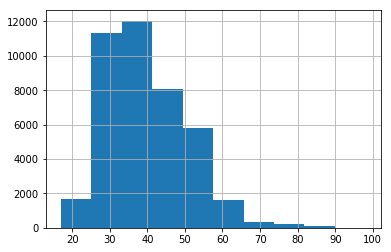

In [10]:
%matplotlib inline

df.age.hist()
df.age.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

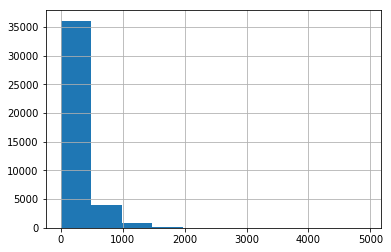

In [11]:
df.duration.hist()
df.duration.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

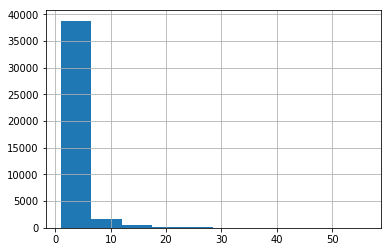

In [12]:
df.campaign.hist()
df.campaign.describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

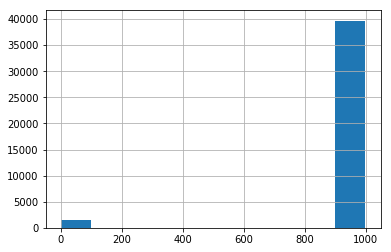

In [13]:
df.pdays.hist()
df.pdays.describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

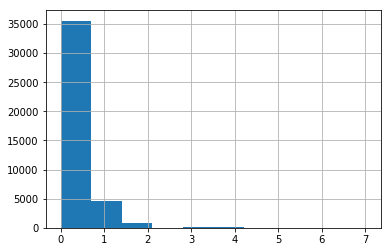

In [14]:
df.previous.hist()
df.previous.describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp_var_rate, dtype: float64

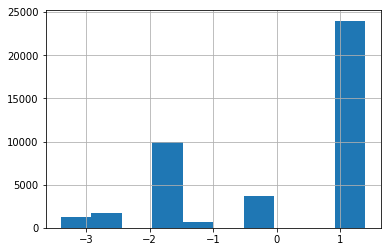

In [15]:
df.emp_var_rate.hist()
df.emp_var_rate.describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons_price_idx, dtype: float64

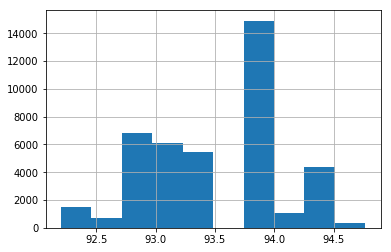

In [16]:

df.cons_price_idx.hist()
df.cons_price_idx.describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons_conf_idx, dtype: float64

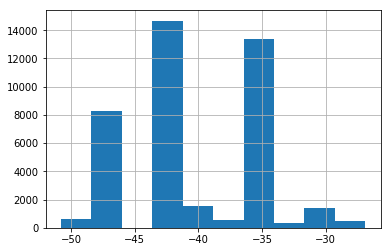

In [17]:

df.cons_conf_idx.hist()
df.cons_conf_idx.describe()


count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

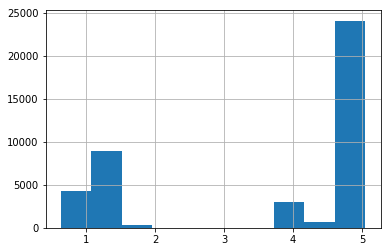

In [18]:
df.euribor3m.hist()
df.euribor3m.describe()
#euribor3m         24712 non-null float64


count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr_employed, dtype: float64

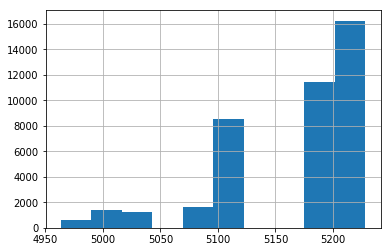

In [19]:
df.nr_employed.hist()
df.nr_employed.describe()


In [10]:
df_train_preproc = df.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df.query('sample == "test"').drop(['sample'], axis=1)


In [11]:
y = list(df_train_preproc['target'])
y_validate = list(df_submit['target'])
X = df_train_preproc.drop(['target'], axis=1)
X_validate = df_test_preproc.drop(['target'], axis=1)

from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\Elena\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# КНН

In [12]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
#parameters



In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def knnClassifier(n_neighbors, weights, metric):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric))
    ])
    return(model)

In [14]:
knn = knnClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)
y_hat_proba = knn.predict_proba(X_test, )

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_hat_proba[:, 1])

0.6612326385409992

## Фитим k

1
6
11
16
21
26
31
36
41
46


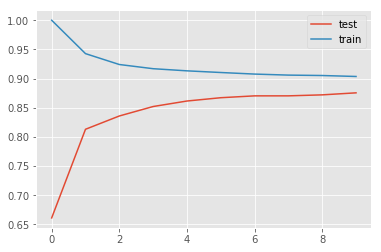

In [52]:
scores_test = []
scores_train = []

for k in range(1, 50, 5):
    print(k)
    knn = knnClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train, )
    
    y_hat_test = knn.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = knn.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))
    
plt.plot(range(1, 50, 5), scores_test, label='test')
plt.plot(range(1, 50, 5), scores_train, label='train')
plt.legend()

50
55
60
65
70
75
80
85
90
95


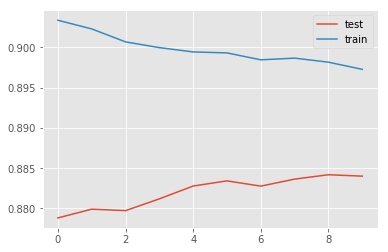

In [53]:
scores_test = []
scores_train = []

for k in range(50, 100, 5):
    print(k)
    knn = knnClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train, )
    
    y_hat_test = knn.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = knn.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))
    
plt.plot(range(50, 100, 5), scores_test, label='test')
plt.plot(range(50, 100, 5), scores_train, label='train')
plt.legend()

100
110
120
130
140


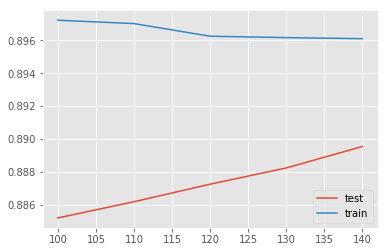

In [54]:
scores_test = []
scores_train = []

for k in range(100, 150, 10):
    print(k)
    knn = knnClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train, )
    
    y_hat_test = knn.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = knn.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))
    
plt.plot(range(100, 150, 10), scores_test, label='test')
plt.plot(range(100, 150, 10), scores_train, label='train')
plt.legend()

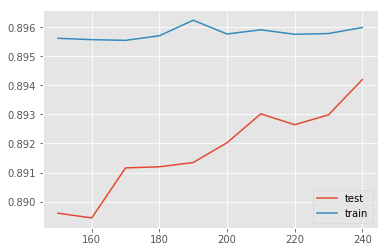

In [29]:
scores_test = []
scores_train = []

for k in range(150, 250, 10):
    knn = knnClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train, )
    
    y_hat_test = knn.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = knn.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))
plt.plot(range(150, 250, 10), scores_test, label='test')
plt.plot(range(150, 250, 10), scores_train, label='train')
plt.legend()

250
300
350
400
450


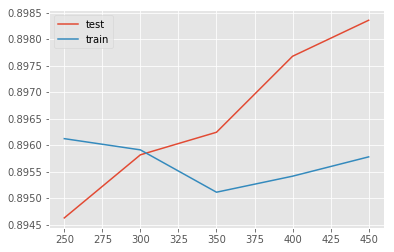

In [35]:
scores_test = []
scores_train = []

for k in range(250, 500, 50):
    print(k)
    knn = knnClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train, )
    
    y_hat_test = knn.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = knn.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))
    
plt.plot(range(250, 500, 50), scores_test, label='test')
plt.plot(range(250, 500, 50), scores_train, label='train')
plt.legend()

500
600
700
800
900


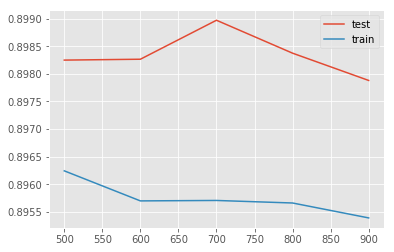

In [18]:
scores_test = []
scores_train = []

for k in range(500, 1000, 100):
    print(k)
    knn = knnClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train, )
    
    y_hat_test = knn.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = knn.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))
    
plt.plot(range(500, 1000, 100), scores_test, label='test')
plt.plot(range(500, 1000, 100), scores_train, label='train')
plt.legend()

## Фитим расстояние

In [19]:
k=700
knn = knnClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train, )
y_hat_test = knn.predict_proba(X_test)
roc_auc_score(y_test, y_hat_test[:, 1])

0.8989708725910769

In [20]:
knn = knnClassifier(n_neighbors=k, weights='uniform', metric='manhattan')
knn.fit(X_train, y_train, )
y_hat_test = knn.predict_proba(X_test)
roc_auc_score(y_test, y_hat_test[:, 1])

0.8844496821199155

## Фитим веса

In [21]:
metric='euclidean'

knn = knnClassifier(n_neighbors=k, weights='distance', metric=metric)
knn.fit(X_train, y_train, )
y_hat_test = knn.predict_proba(X_test)
roc_auc_score(y_test, y_hat_test[:, 1])

0.9002591096830262

## Итоговая модель, обучаем на всей выборке и тестируем на валидирующей

In [40]:
k=700
metric='euclidean'
weights='distance'

knn = knnClassifier(n_neighbors=k, weights='distance', metric=metric)
knn.fit(X, y, )
yy_prediction_knn = knn.predict(X_validate)



In [47]:
result_knn = pd.DataFrame({"_id":X_validate.index, "target":yy_prediction_knn})
result_knn.target = result_knn.target.astype(int)

# Дерево принятия решений

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(criterion='entropy', random_state=123)
tree.fit(X_train,y_train)
y_hat_test = tree.predict_proba(X_test)
roc_auc_score(y_test, y_hat_test[:, 1])


0.722901483259868

## Фитим глубину дерева

Text(0,0.5,'ROC AUC')

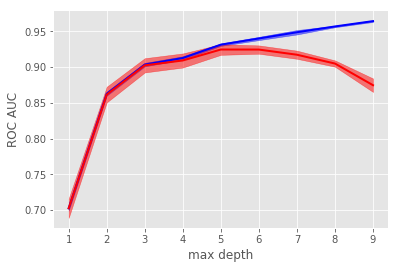

In [42]:
from sklearn.model_selection import (StratifiedKFold, validation_curve)

model = DecisionTreeClassifier(random_state=123)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132)

train_scores, valid_scores = validation_curve(model, X, y, 
                                              'max_depth', range(1, 10),
                                              cv=cv, scoring='roc_auc')

train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,10), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,10), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,10), train_score_mean, c='b', lw=2)
plt.plot(range(1,10), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('ROC AUC')


In [43]:
max_depth = 6
tree = DecisionTreeClassifier(criterion='entropy', max_depth = max_depth, random_state=123)
tree.fit(X_train,y_train)
y_hat_test = tree.predict_proba(X_test)
roc_auc_score(y_test, y_hat_test[:, 1])


0.9137503062180728

## Фитим все гиперпараметры

In [44]:
from scipy.stats import randint as randint
from scipy.stats import uniform

try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import GridSearchCV
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold


RND_SEED = 123
# Определим пространство поиска

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 8),
    'min_samples_leaf': randint(5, 10),
    'class_weight': [None, 'balanced']}

# Некоторые параметры мы задали не простым перечислением значений, а 
# с помощью распределений.

# Будем делать 200 запусков поиска
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

model = DecisionTreeClassifier(random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=200, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)
# А дальше, просто .fit()
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F587BB8BA8>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F587BB8860>, 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [45]:
random_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 8}

In [46]:
random_search.best_score_

0.936469847975743

In [50]:
model = random_search.best_estimator_
model.feature_importances_

feature_names = X.columns
importances = pd.Series(index=feature_names, data=model.feature_importances_).sort_values()
importances

job_admin.               0.000000
job_entrepreneur         0.000000
job_housemaid            0.000000
job_management           0.000000
job_retired              0.000000
job_self-employed        0.000000
job_services             0.000000
job_student              0.000000
job_technician           0.000000
job_unemployed           0.000000
job_unknown              0.000000
loan_no                  0.000000
loan_unknown             0.000000
loan_yes                 0.000000
marital_divorced         0.000000
marital_single           0.000000
marital_unknown          0.000000
month_apr                0.000000
month_aug                0.000000
month_dec                0.000000
month_jul                0.000000
month_jun                0.000000
month_mar                0.000000
month_may                0.000000
month_nov                0.000000
month_sep                0.000000
housing_yes              0.000000
housing_unknown          0.000000
poutcome_success         0.000000
education_unkn

## Строим модель по лучшим параметрам, делаем предсказание на валидирующей выборке

In [52]:

model = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'entropy', max_depth = 6, min_samples_leaf = 8)
model.fit(X, y)

y_prediction_dt =  tree.predict(X_validate)

In [56]:
result_dt = pd.DataFrame({"_id":X_validate.index, "target":y_prediction_dt})
result_dt.target = result_dt.target.astype(int)

# Логистическая регрессия

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', C=1, fit_intercept=True)
model.fit(X_train, y_train)

y_hat_test=model.predict_proba(X_test)

roc_auc_score(y_test, y_hat_test[:, 1])

0.9344430658237523

## Выбираем наиболее значимые признаки

In [58]:
import numpy as np
import statsmodels.api as sm
from scipy import stats

params = np.append(model.intercept_,model.coef_)
predictions = model.predict(X)


newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coeff_names"],myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [["Intercept"]+list(X.columns),params,sd_b,ts_b,p_values]
print(myDF3)

C:\Users\Elena\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
C:\Users\Elena\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Elena\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Elena\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


                      Coeff_names  Coefficients  Standard Errors  t values  \
0                       Intercept        0.0000       108396.712     0.000   
1                             age        0.0034            0.000    14.381   
2                        campaign       -0.0376            0.001   -53.598   
3                   cons_conf_idx        0.0008            0.001     0.770   
4                  cons_price_idx        0.3990            0.031    13.024   
5                         contact       -0.4889            0.007   -65.548   
6                        duration        0.0046            0.000   627.897   
7                    emp_var_rate       -0.6442            0.018   -35.183   
8                       euribor3m        0.2531            0.016    16.283   
9                     nr_employed       -0.0080            0.000   -21.592   
10                          pdays       -0.0012            0.000   -33.127   
11                       previous        0.0107            0.009

In [59]:

inportant_features = myDF3[myDF3.Probabilites<=0.01].Coeff_names

X_train_if = X_train.loc[:,inportant_features]
X_test_if = X_test.loc[:,inportant_features]
X_validate_if = X_validate.loc[:,inportant_features]



In [63]:
model = LogisticRegression(penalty='l1', C=1, fit_intercept=True)
model.fit(X_train_if, y_train)

y_hat_test=model.predict_proba(X_test_if)

roc_auc_score(y_test, y_hat_test[:, 1])

0.9252123849121008

## Мы выиграли в скорости, но потеряли в качестве

## Фитим коэффициент регуляризации L1

0.001
0.007742636826811269
0.05994842503189409
0.46415888336127775
3.593813663804626
27.825594022071257
215.44346900318823
1668.1005372000557
12915.496650148827
100000.0


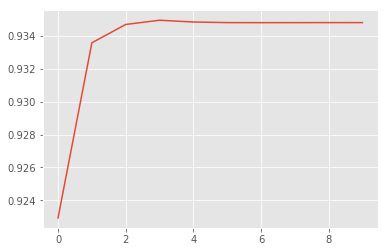

In [65]:
coefs = np.empty((X_train.shape[1],))
scores = []

c_range = np.logspace(-3, 5, 10)

for C in c_range:
    print(C)
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='l1', fit_intercept=True, C=C))
    ])

    model.fit(X_train, y_train)
    
    
    coefs = np.c_[coefs, model.named_steps['clf'].coef_[0]]
    s = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    scores.append(s)
    
plt.plot(scores)

0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.5999999999999999
0.6499999999999999
0.7
0.7499999999999999
0.7999999999999998
0.8499999999999999
0.8999999999999999
0.95


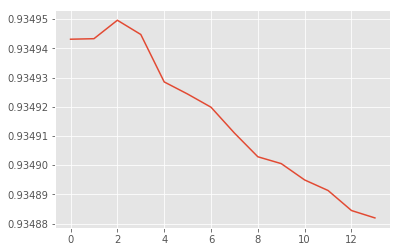

In [75]:
coefs = np.empty((X_train.shape[1],))
scores = []
c_range = np.arange(0.3,1,0.05)

for C in c_range:
    print(C)
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='l1', fit_intercept=True, C=C))
    ])

    model.fit(X_train, y_train)
    
    
    coefs = np.c_[coefs, model.named_steps['clf'].coef_[0]]
    s = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    scores.append(s)
    
plt.plot(scores)

In [76]:
C1 = 0.4
model = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='l1', fit_intercept=True, C=C1))
    ])
model.fit(X_train, y_train)
    
    
coefs = np.c_[coefs, model.named_steps['clf'].coef_[0]]
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


0.9349501647575087

## Фитим коэффициент регуляризации L2

0.001
0.007742636826811269
0.05994842503189409
0.46415888336127775
3.593813663804626
27.825594022071257
215.44346900318823
1668.1005372000557
12915.496650148827
100000.0


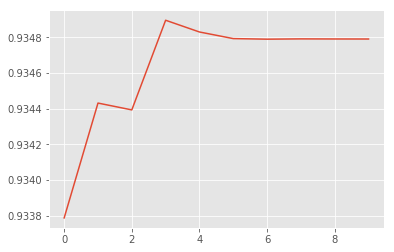

In [68]:
coefs = np.empty((X_train.shape[1],))
scores = []

c_range = np.logspace(-3, 5, 10)

for C in c_range:
    print(C)
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='l2', fit_intercept=True, C=C))
    ])

    model.fit(X_train, y_train)
    
    
    coefs = np.c_[coefs, model.named_steps['clf'].coef_[0]]
    s = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    scores.append(s)
    
plt.plot(scores)

0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.5999999999999999
0.6499999999999999
0.7
0.7499999999999999
0.7999999999999998
0.8499999999999999
0.8999999999999999
0.95


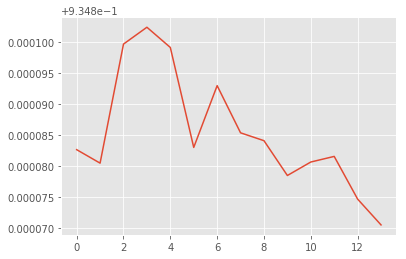

In [73]:
coefs = np.empty((X_train.shape[1],))
scores = []
c_range = np.arange(0.3,1,0.05)

for C in c_range:
    print(C)
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='l2', fit_intercept=True, C=C))
    ])

    model.fit(X_train, y_train)
    
    
    coefs = np.c_[coefs, model.named_steps['clf'].coef_[0]]
    s = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    scores.append(s)
    
plt.plot(scores)

In [74]:
coefs = np.empty((X_train.shape[1],))
C2 = 0.45
model = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='l2', fit_intercept=True, C=C2))
    ])
model.fit(X_train, y_train)
    
    
coefs = np.c_[coefs, model.named_steps['clf'].coef_[0]]
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.9349025057619544

## Выбираем l1

## Строим лучшую модель, делаем предсказание на валидирующей выборке


In [79]:
C = 0.4
model = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='l1', fit_intercept=True, C=C))
    ])
model.fit(X, y)
    
    
y_prediction_lr = model.predict(X_validate)

In [81]:
result_lr = pd.DataFrame({"_id":X_validate.index, "target":y_prediction_lr})
result_lr.target = result_lr.target.astype(int)

# Лучшее решение - дерево принятия решения

In [84]:
result_dt.to_csv("result.csv", index = False)